In [2]:
import pandas as pd

df = pd.read_csv("dataset_completo_con_ratios.csv")

print(df.shape)
df.head()


(38916, 27)


,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,lat,lon,geometry,category_title,like_ratio,total_interactions,trending_clasify,views_per_comment,dislikes_adj,like_dislike_ratio
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515.000,55681.000,8093.75,...,50.700405,-3.529950,POINT (-3.529950197 50.70040529),Howto & Style,0.873088,73253.750,Base,762.160038,8093.75,6.879506
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632.000,25561.000,2294.00,...,53.500415,-2.247987,POINT (-2.247987103 53.50041526),Entertainment,0.917645,30612.000,Base,382.166123,2294.00,11.142546
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",8831780.375,276377.625,8093.75,...,51.383749,-2.350022,POINT (-2.350022218 51.3837486),Music,0.971548,306556.625,Alta,399.894969,8093.75,34.147042
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833.000,193.000,12.00,...,57.170398,-2.079987,POINT (-2.079987021 57.17039797),Sports,0.941463,242.000,Base,752.243243,12.00,16.083333
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815.000,30.000,2.00,...,50.900031,-1.399977,POINT (-1.399976849 50.90003135),News & Politics,0.937500,62.000,Base,327.166667,2.00,15.000000


In [2]:
columnas_numericas = df.select_dtypes(include=['number']).columns

for col in columnas_numericas:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5 * IQR) | (df[col] > Q3 + 1.5 * IQR)]
    print(f"{col}: {len(outliers)} atipicos")


category_id: 0 atipicos
views: 0 atipicos
likes: 0 atipicos
dislikes: 0 atipicos
comment_count: 0 atipicos
lat: 0 atipicos
lon: 0 atipicos


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuraciones generales
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


Pregunta 1

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_13208\444143971.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tendencias_por_categoria.index, y=tendencias_por_categoria.values, palette="viridis")


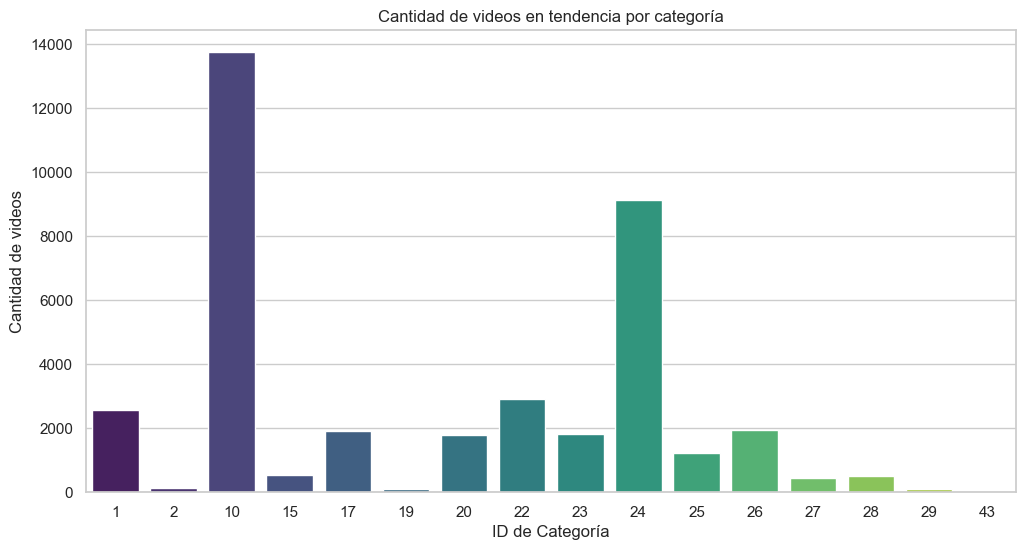

In [7]:
tendencias_por_categoria = df['category_id'].value_counts().sort_values(ascending=False)

sns.barplot(x=tendencias_por_categoria.index, y=tendencias_por_categoria.values, palette="viridis")
plt.title("Cantidad de videos en tendencia por categoría")
plt.xlabel("ID de Categoría")
plt.ylabel("Cantidad de videos")
plt.show()


Pregunta 2

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_13208\2045151287.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=likes_por_categoria.index, y=likes_por_categoria.values, palette="Blues_r")


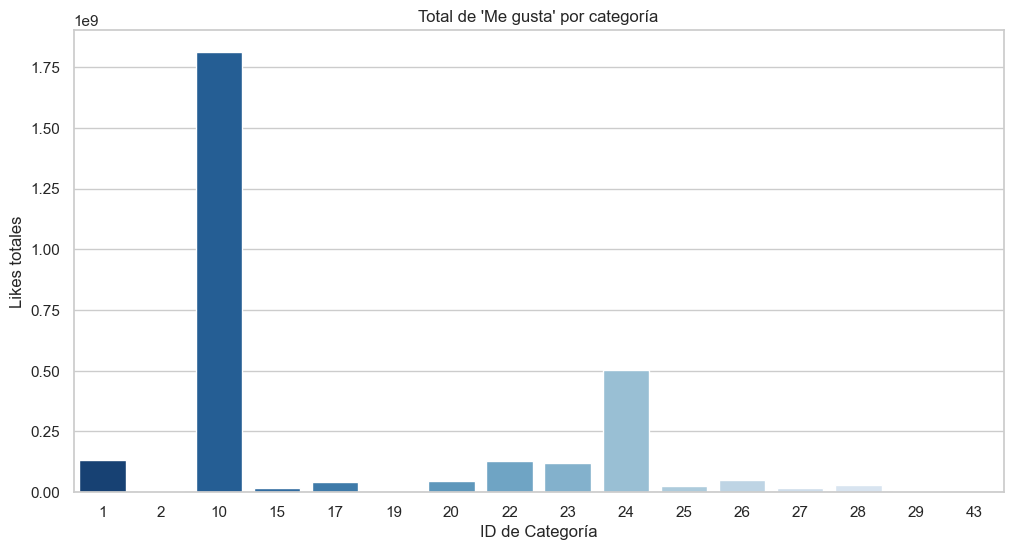

In [8]:
likes_por_categoria = df.groupby('category_id')['likes'].sum().sort_values(ascending=False)

sns.barplot(x=likes_por_categoria.index, y=likes_por_categoria.values, palette="Blues_r")
plt.title("Total de 'Me gusta' por categoría")
plt.xlabel("ID de Categoría")
plt.ylabel("Likes totales")
plt.show()


Pregunta 3

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_13208\243539031.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratio_por_categoria.index, y=ratio_por_categoria.values, palette="coolwarm")


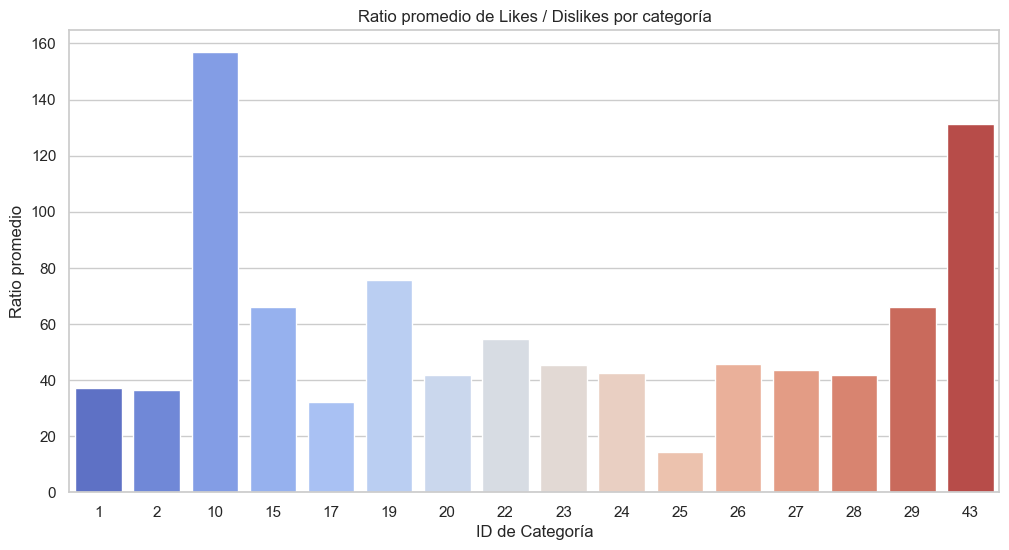

In [9]:
df['ratio_likes_dislikes'] = df['likes'] / (df['dislikes'] + 1)  # evitamos división por 0

ratio_por_categoria = df.groupby('category_id')['ratio_likes_dislikes'].mean().sort_values(ascending=False)

sns.barplot(x=ratio_por_categoria.index, y=ratio_por_categoria.values, palette="coolwarm")
plt.title("Ratio promedio de Likes / Dislikes por categoría")
plt.xlabel("ID de Categoría")
plt.ylabel("Ratio promedio")
plt.show()


Pregunta 4

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_13208\3060577673.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratio_vc.index, y=ratio_vc.values, palette="crest")


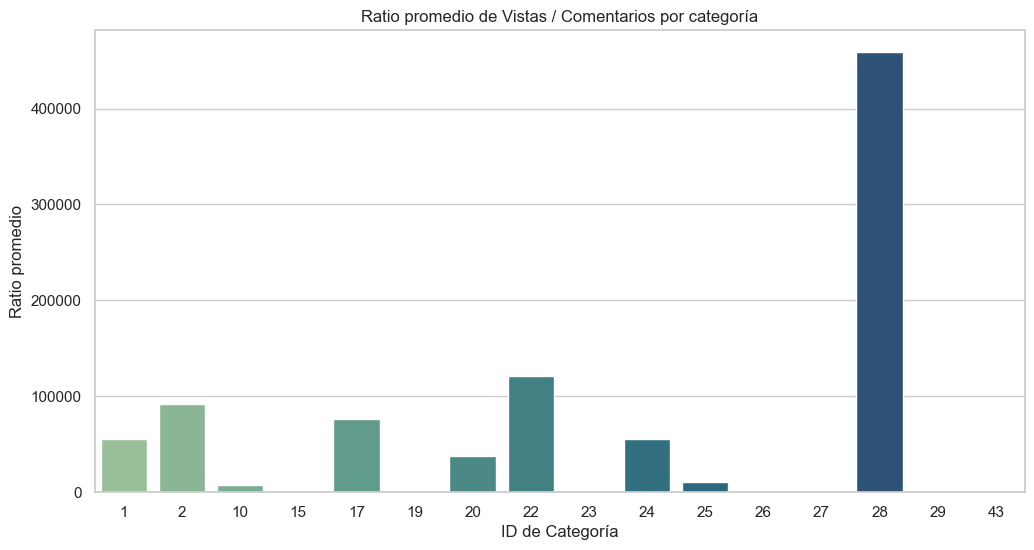

In [10]:
df['ratio_views_comments'] = df['views'] / (df['comment_count'] + 1)

ratio_vc = df.groupby('category_id')['ratio_views_comments'].mean().sort_values(ascending=False)

sns.barplot(x=ratio_vc.index, y=ratio_vc.values, palette="crest")
plt.title("Ratio promedio de Vistas / Comentarios por categoría")
plt.xlabel("ID de Categoría")
plt.ylabel("Ratio promedio")
plt.show()


Pregunta 5

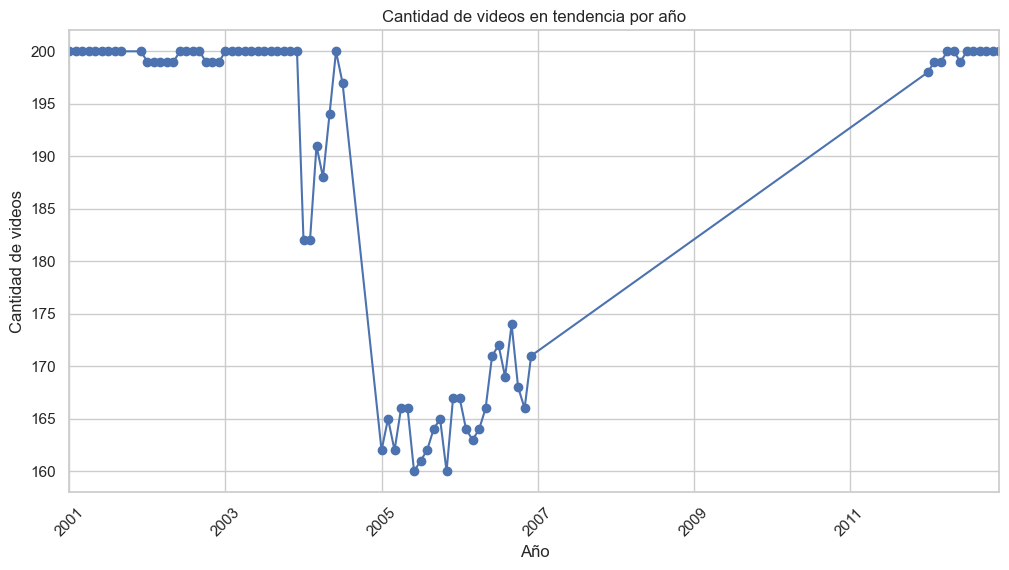

In [11]:
# Convertimos trending_date a datetime si no lo está
df['trending_date'] = pd.to_datetime(df['trending_date'], errors='coerce')

# Agrupamos por mes
df['trending_year'] = df['trending_date'].dt.to_period('M')

tendencias_por_mes = df['trending_year'].value_counts().sort_index()

tendencias_por_mes.plot(kind='line', marker='o')
plt.title("Cantidad de videos en tendencia por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de videos")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Pregunta 6

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_13208\2707365291.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=canales_top.index, x=canales_top.values, palette="mako")


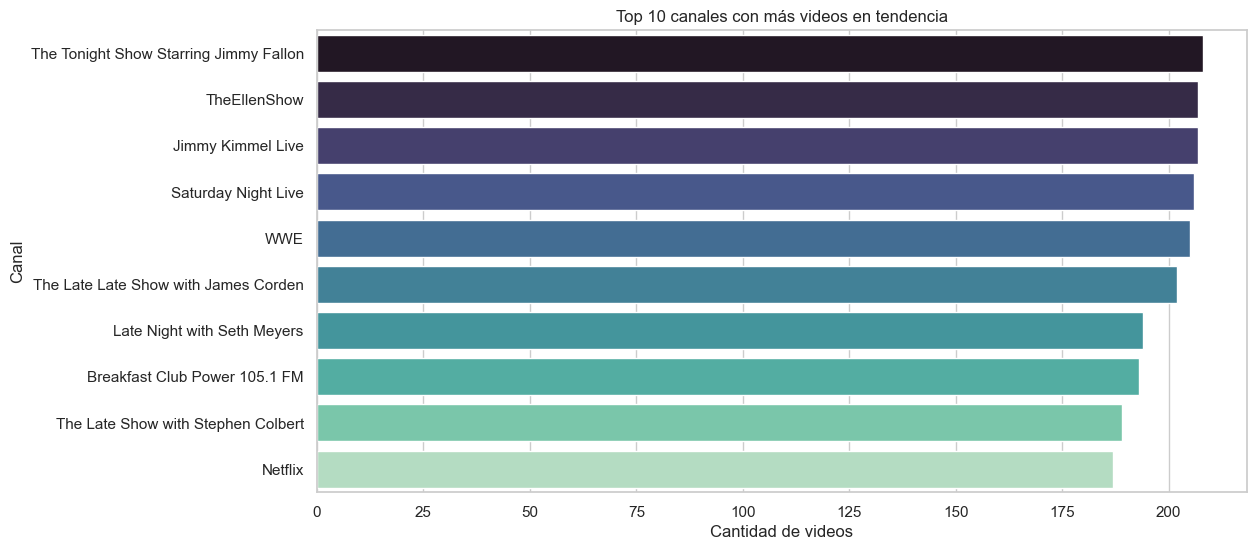

In [12]:
canales_top = df['channel_title'].value_counts().head(10)

sns.barplot(y=canales_top.index, x=canales_top.values, palette="mako")
plt.title("Top 10 canales con más videos en tendencia")
plt.xlabel("Cantidad de videos")
plt.ylabel("Canal")
plt.show()


Pregunta 7

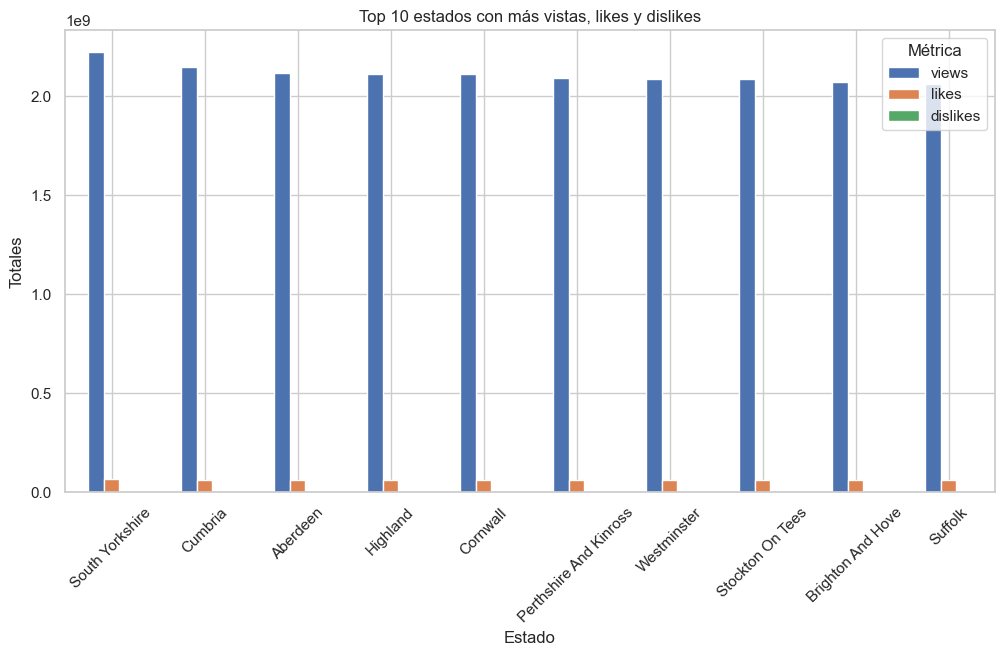

In [13]:
por_estado = df.groupby('state')[['views', 'likes', 'dislikes']].sum().sort_values('views', ascending=False).head(10)

por_estado.plot(kind='bar')
plt.title("Top 10 estados con más vistas, likes y dislikes")
plt.xlabel("Estado")
plt.ylabel("Totales")
plt.xticks(rotation=45)
plt.legend(title="Métrica")
plt.show()


Pregunta 8

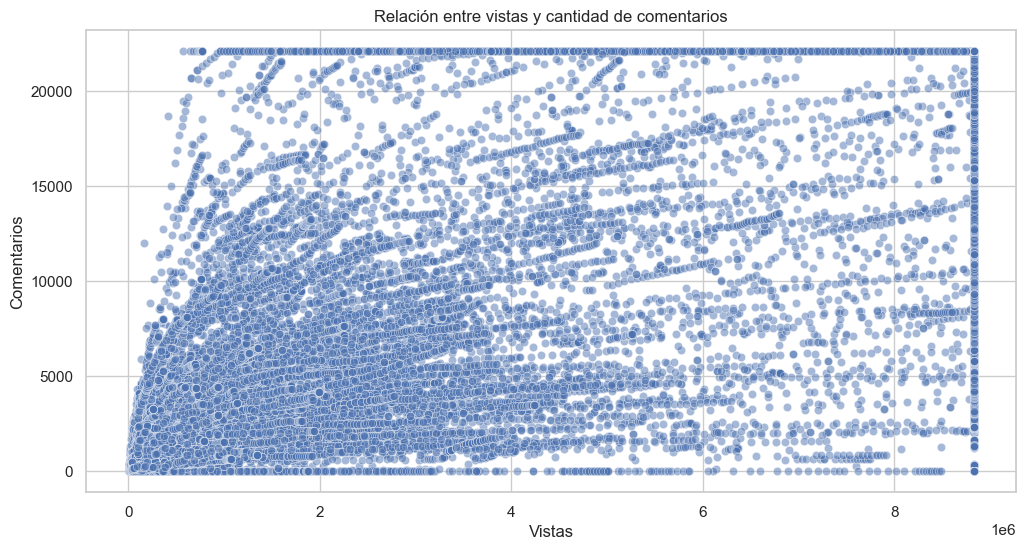

In [14]:
sns.scatterplot(x='views', y='comment_count', data=df, alpha=0.5)
plt.title("Relación entre vistas y cantidad de comentarios")
plt.xlabel("Vistas")
plt.ylabel("Comentarios")
plt.show()


INSIGHTS

Insight 1: Categorías más vistas

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_3216\3706472190.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categorias_vistas.values, y=top_categorias_vistas.index, palette='viridis')


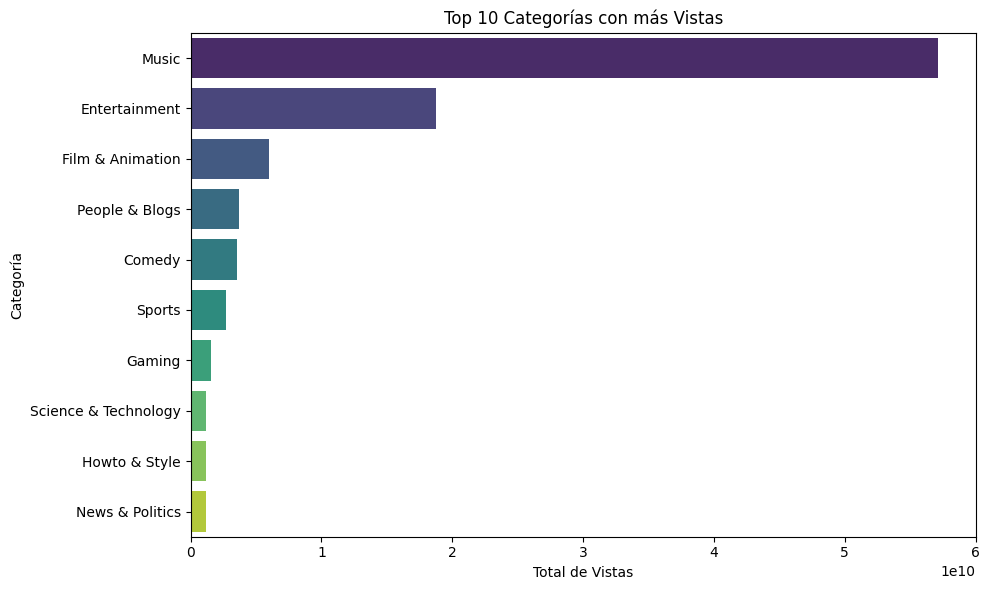

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

top_categorias_vistas = df.groupby('category_title')['views'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categorias_vistas.values, y=top_categorias_vistas.index, palette='viridis')
plt.title('Top 10 Categorías con más Vistas')
plt.xlabel('Total de Vistas')
plt.ylabel('Categoría')
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()


Insight 2: Categorías con mejor ratio de Likes/Dislikes

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_3216\202196032.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_like_ratio.values, y=top_like_ratio.index, palette='Blues_d')


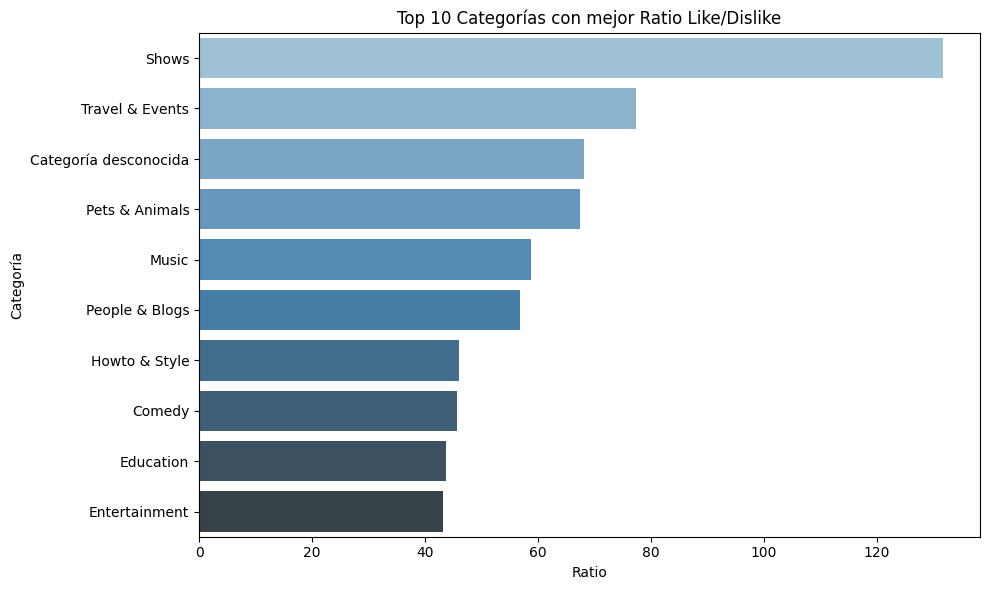

In [7]:
df_ratio = df[df['dislikes'] != 0].copy()
df_ratio['like_dislike_ratio'] = df_ratio['likes'] / df_ratio['dislikes']
top_like_ratio = df_ratio.groupby('category_title')['like_dislike_ratio'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_like_ratio.values, y=top_like_ratio.index, palette='Blues_d')
plt.title('Top 10 Categorías con mejor Ratio Like/Dislike')
plt.xlabel('Ratio')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

Insight 3: Ratio de Vistas/Comentarios por categoría

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_3216\2489298266.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_views_comments.values, y=top_views_comments.index, palette='mako')


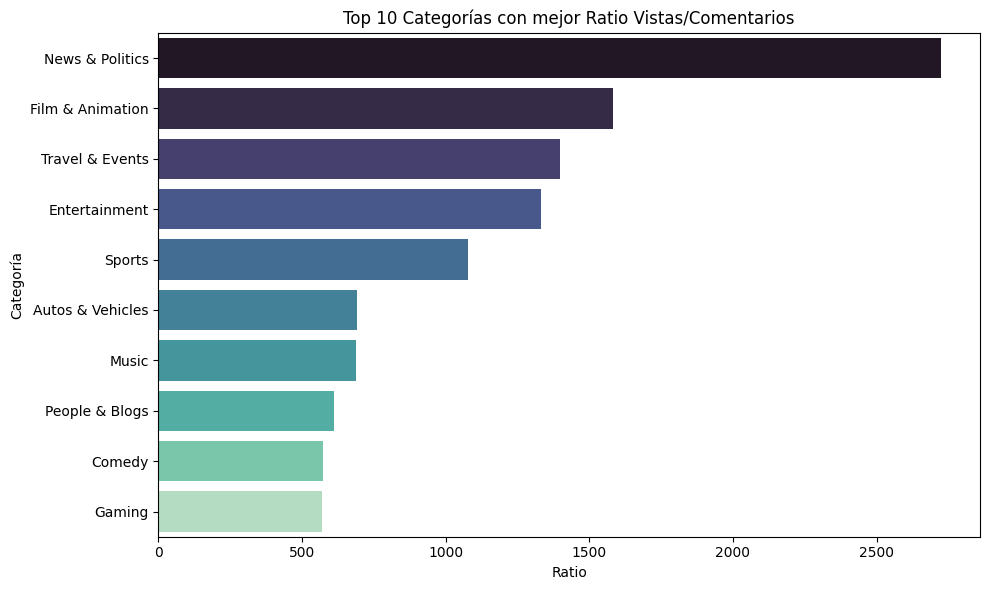

In [9]:
df_ratio2 = df[df['comment_count'] != 0].copy()
df_ratio2['views_comments_ratio'] = df_ratio2['views'] / df_ratio2['comment_count']
top_views_comments = df_ratio2.groupby('category_title')['views_comments_ratio'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_views_comments.values, y=top_views_comments.index, palette='mako')
plt.title('Top 10 Categorías con mejor Ratio Vistas/Comentarios')
plt.xlabel('Ratio')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()

Insight 4: Volumen de videos en tendencia a lo largo del tiempo

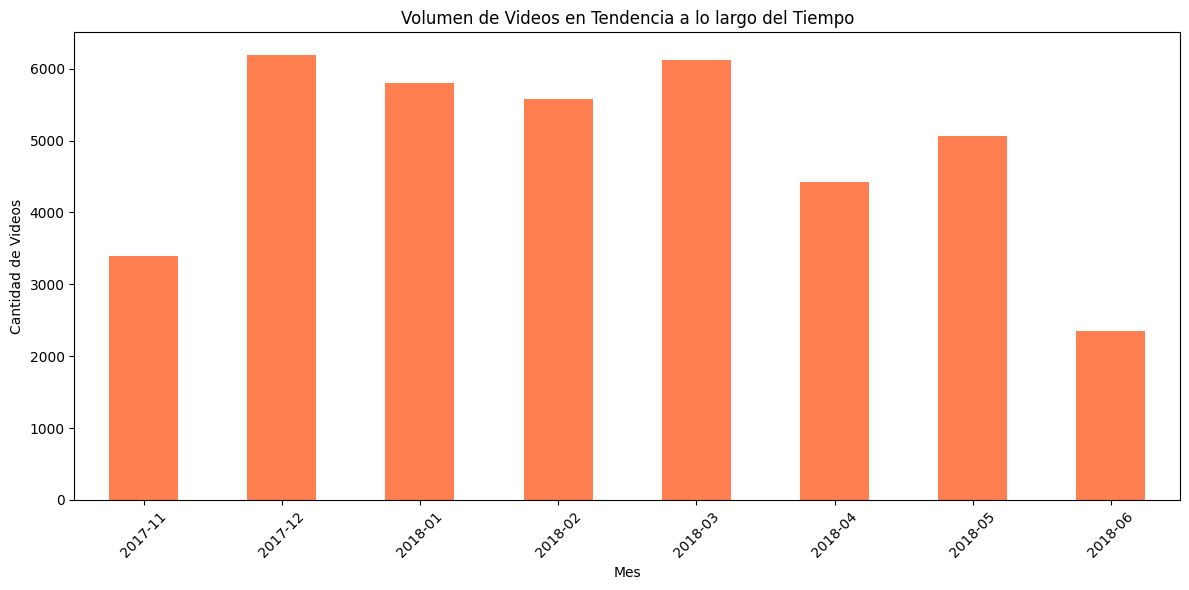

In [25]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')

trending_by_month = df['trending_date'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(12,6))
trending_by_month.plot(kind='bar', color='coral')
plt.title('Volumen de Videos en Tendencia a lo largo del Tiempo')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Videos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight 5: Canales más frecuentes en tendencia

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_3312\762578780.py:14: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  matriz_likes = df.pivot_table(index='rango_vistas',


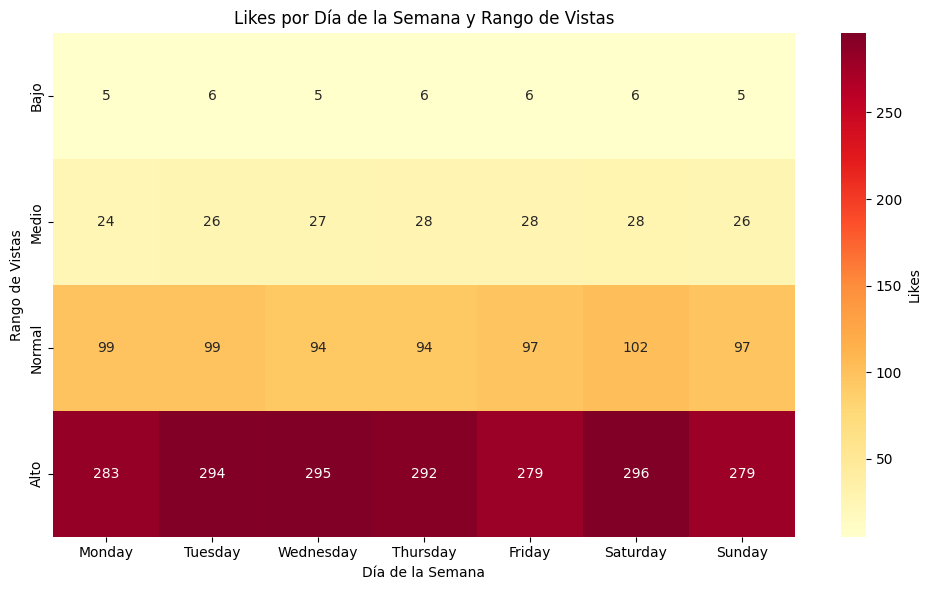

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m', errors='coerce')
df['trending_day'] = df['trending_date'].dt.day_name()

dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['trending_day'] = pd.Categorical(df['trending_day'], categories=dias_ordenados, ordered=True)

df['rango_vistas'] = pd.qcut(df['views'], q=4, labels=['Bajo', 'Medio', 'Normal', 'Alto'])

matriz_likes = df.pivot_table(index='rango_vistas',
                              columns='trending_day',
                              values='likes',
                              aggfunc='sum',
                              fill_value=0)
matriz_likes_mil = matriz_likes / 1000000

plt.figure(figsize=(10,6))
sns.heatmap(matriz_likes_mil, annot=True, fmt=".0f", cmap="YlOrRd", cbar_kws={'label': 'Likes'})
plt.title("Likes por Día de la Semana y Rango de Vistas")
plt.xlabel("Día de la Semana")
plt.ylabel("Rango de Vistas")
plt.tight_layout()
plt.show()


Insight 6: Estados con más vistas

C:\Users\Angel Diaz\AppData\Local\Temp\ipykernel_3312\307447815.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top['publish_month'] = pd.to_datetime(df_top['publish_time']).dt.month


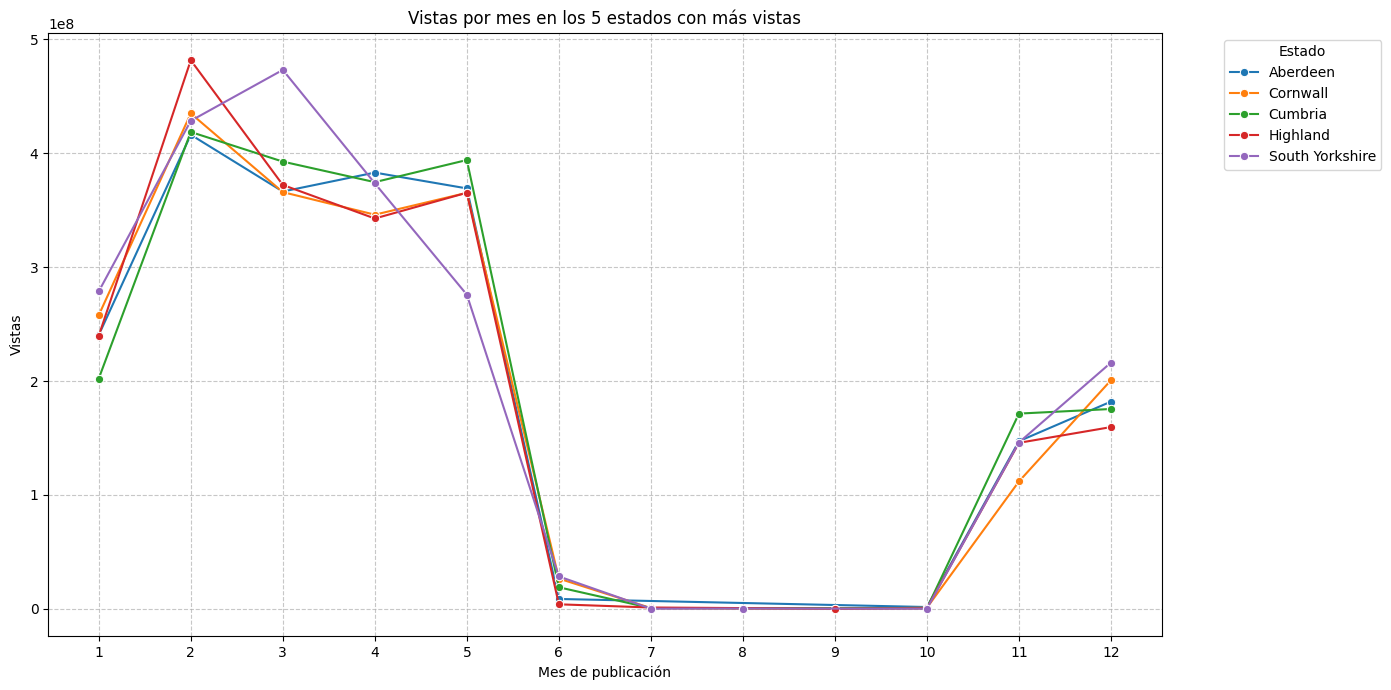

In [5]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

le = LabelEncoder()
df['state_encoded'] = le.fit_transform(df['state'])

top_states_encoded = (
    df.groupby('state_encoded')['views']
    .sum()
    .sort_values(ascending=False)
    .head(5)
    .index
)

df_top = df[df['state_encoded'].isin(top_states_encoded)]

df_top['publish_month'] = pd.to_datetime(df_top['publish_time']).dt.month

df_grouped = (
    df_top.groupby(['publish_month', 'state_encoded'])['views']
    .sum()
    .reset_index()
)

df_grouped['state'] = le.inverse_transform(df_grouped['state_encoded'])

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_grouped, x='publish_month', y='views', hue='state', marker='o')

plt.title('Vistas por mes en los 5 estados con más vistas')
plt.xlabel('Mes de publicación')
plt.ylabel('Vistas')
plt.xticks(range(1, 13))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Estado', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Código para scatterplot de total_interactions vs views agrupado por trending_clasify
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo del gráfico
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# Crear el scatter plot con escala logarítmica
scatter = sns.scatterplot(
    data=df_gamero,
    x='views',
    y='total_interactions',
    hue='trending_clasify',
    palette={'Base': '#1f77b4', 'Media': '#ff7f0e', 'Alta': '#d62728'},
    alpha=0.6,
    s=80,
    edgecolor='w',
    linewidth=0.5
)

# Aplicar escala logarítmica a ambos ejes
plt.xscale('log')
plt.yscale('log')

# Añadir títulos y etiquetas
plt.title('Relación entre Views y Total Interactions por Clasificación Trending', fontsize=14, pad=20)
plt.xlabel('Views (log scale)', fontsize=12)
plt.ylabel('Total Interactions (log scale)', fontsize=12)

# Personalizar la leyenda
plt.legend(
    title='Clasificación Trending',
    title_fontsize=12,
    fontsize=11,
    frameon=True,
    framealpha=0.8
)

# Añadir grid
plt.grid(True, which="both", ls="--", alpha=0.3)

# Ajustar layout y mostrar
plt.tight_layout()
plt.show()